In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


In [4]:
import scipy.integrate
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV, validation_curve
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_excel('high_Titer1.43_SEP22.xlsx')

In [6]:
df.shape

(929, 17)

In [7]:
df.head(3)

Material_ Batch Sample_Description         Sample_Time  Duration(days)  \
0   804564 SB0008  Day 0 (Post-inoc) 2018-08-13 11:09:00        0.038889   
1   804564 SB0008         Day 0 12hr 2018-08-13 21:45:00        0.480556   
2   804564 SB0008              Day 1 2018-08-14 09:09:00        0.955556   

     VCD  Viability(%)  PCV_final_ result(%)  Offline pH  pO2 (mmHg)  \
0  14.03          97.3                  0.22        7.12        84.5   
1  20.12          96.8                  0.33        7.15        89.5   
2  27.76          97.4                  0.46        7.04        72.8   

   pCO2(mmHg)  GLN(mmol/L)  GLUC(g/L)  LAC(g/L)  Ammonia(mmol/L)  \
0        18.5         5.68       7.19      0.39             3.30   
1        23.3         5.43       7.22      0.50             3.92   
2        33.3         0.00       7.60      0.71             4.26   

   Sodium(mmol/L)\n  Osmolality(mOsm/kg)  Titer(g/L)  
0              68.7                  319         0.0  
1              72.8                  327         0.0  
2              76.8                  326         0.0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Material_ Batch       929 non-null    object        
 1   Sample_Description    929 non-null    object        
 2   Sample_Time           929 non-null    datetime64[ns]
 3   Duration(days)        929 non-null    float64       
 4   VCD                   929 non-null    float64       
 5   Viability(%)          929 non-null    float64       
 6   PCV_final_ result(%)  929 non-null    float64       
 7   Offline pH            929 non-null    float64       
 8   pO2 (mmHg)            929 non-null    float64       
 9   pCO2(mmHg)            929 non-null    float64       
 10  GLN(mmol/L)           929 non-null    float64       
 11  GLUC(g/L)             929 non-null    float64       
 12  LAC(g/L)              929 non-null    float64       
 13  Ammonia(mmol/L)     

In [9]:
df.columns = df.columns.str.rstrip()

In [40]:
df.columns

Index(['Material_ Batch', 'Sample_Description', 'Sample_Time',
       'Duration(days)', 'VCD', 'Viability(%)', 'PCV_final_ result(%)',
       'Offline pH', 'pO2 (mmHg)', 'pCO2(mmHg)', 'GLN(mmol/L)', 'GLUC(g/L)',
       'LAC(g/L)', 'Ammonia(mmol/L)', 'Sodium(mmol/L)', 'Osmolality(mOsm/kg)',
       'Titer(g/L)'],
      dtype='object')

In [13]:
df1 =df[['Duration(days)','VCD','Viability(%)','PCV_final_ result(%)','Offline pH','pO2 (mmHg)','pCO2(mmHg)','GLN(mmol/L)','GLUC(g/L)','LAC(g/L)','Ammonia(mmol/L)','Sodium(mmol/L)','Osmolality(mOsm/kg)','Titer(g/L)','Material_ Batch']]

In [14]:
df1.columns

Index(['Duration(days)', 'VCD', 'Viability(%)', 'PCV_final_ result(%)',
       'Offline pH', 'pO2 (mmHg)', 'pCO2(mmHg)', 'GLN(mmol/L)', 'GLUC(g/L)',
       'LAC(g/L)', 'Ammonia(mmol/L)', 'Sodium(mmol/L)', 'Osmolality(mOsm/kg)',
       'Titer(g/L)', 'Material_ Batch'],
      dtype='object')

In [15]:
df1.shape

(929, 15)

In [16]:
sum_missing = df1.isnull().sum()
percent_missing = df1.isnull().sum() * 100 / len(df1)
missing_value_df = pd.DataFrame({'sum_missing':sum_missing,'percent_missing': percent_missing})
missing_value_df

sum_missing  percent_missing
Duration(days)                  0              0.0
VCD                             0              0.0
Viability(%)                    0              0.0
PCV_final_ result(%)            0              0.0
Offline pH                      0              0.0
pO2 (mmHg)                      0              0.0
pCO2(mmHg)                      0              0.0
GLN(mmol/L)                     0              0.0
GLUC(g/L)                       0              0.0
LAC(g/L)                        0              0.0
Ammonia(mmol/L)                 0              0.0
Sodium(mmol/L)                  0              0.0
Osmolality(mOsm/kg)             0              0.0
Titer(g/L)                      0              0.0
Material_ Batch                 0              0.0

In [18]:
df1.columns = df1.columns.str.rstrip()

In [19]:
df1.describe().transpose().round(3)

count     mean     std      min      25%      50%  \
Duration(days)        929.0    6.035   3.558    0.023    2.966    6.099   
VCD                   929.0   63.724  19.825   10.960   55.170   72.310   
Viability(%)          929.0   94.842   2.960   79.200   93.200   95.100   
PCV_final_ result(%)  929.0    2.262   1.163    0.180    1.100    2.550   
Offline pH            929.0    6.931   0.072    6.800    6.880    6.920   
pO2 (mmHg)            929.0   67.838  30.882    2.100   43.200   70.100   
pCO2(mmHg)            929.0   48.658  15.307   10.200   36.300   50.300   
GLN(mmol/L)           929.0    3.173   2.143    0.000    1.380    2.290   
GLUC(g/L)             929.0   10.181   4.017    0.000    6.990    8.820   
LAC(g/L)              929.0    0.923   0.444    0.000    0.550    0.950   
Ammonia(mmol/L)       929.0    7.056   2.698    0.900    4.790    6.820   
Sodium(mmol/L)        929.0   83.365   7.838   20.550   76.900   82.500   
Osmolality(mOsm/kg)   929.0  354.888  29.366  316.000  326.000  350.000   
Titer(g/L)            929.0    0.159   0.389    0.000    0.000    0.000   

                          75%      max  
Duration(days)          9.106   12.262  
VCD                    77.130  121.140  
Viability(%)           97.300   99.300  
PCV_final_ result(%)    3.250    4.100  
Offline pH              6.960    7.540  
pO2 (mmHg)             91.900  187.700  
pCO2(mmHg)             58.200   97.600  
GLN(mmol/L)             5.000    9.890  
GLUC(g/L)              13.690   19.990  
LAC(g/L)                1.280    2.030  
Ammonia(mmol/L)         9.530   12.760  
Sodium(mmol/L)         89.700  137.300  
Osmolality(mOsm/kg)   385.000  416.000  
Titer(g/L)              0.000    1.462

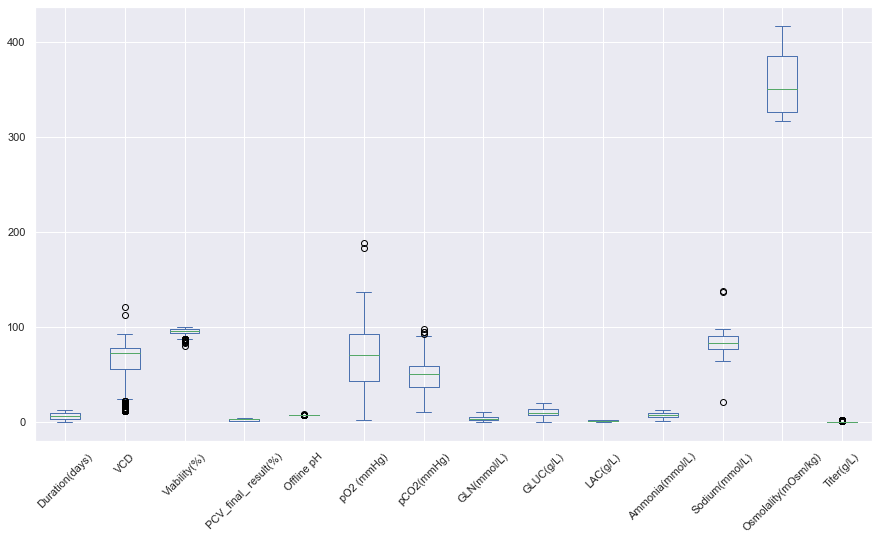

In [24]:
df1.plot.box(grid = 'True')
plt.xticks(rotation=45)
plt.gcf().set_size_inches(15,8)

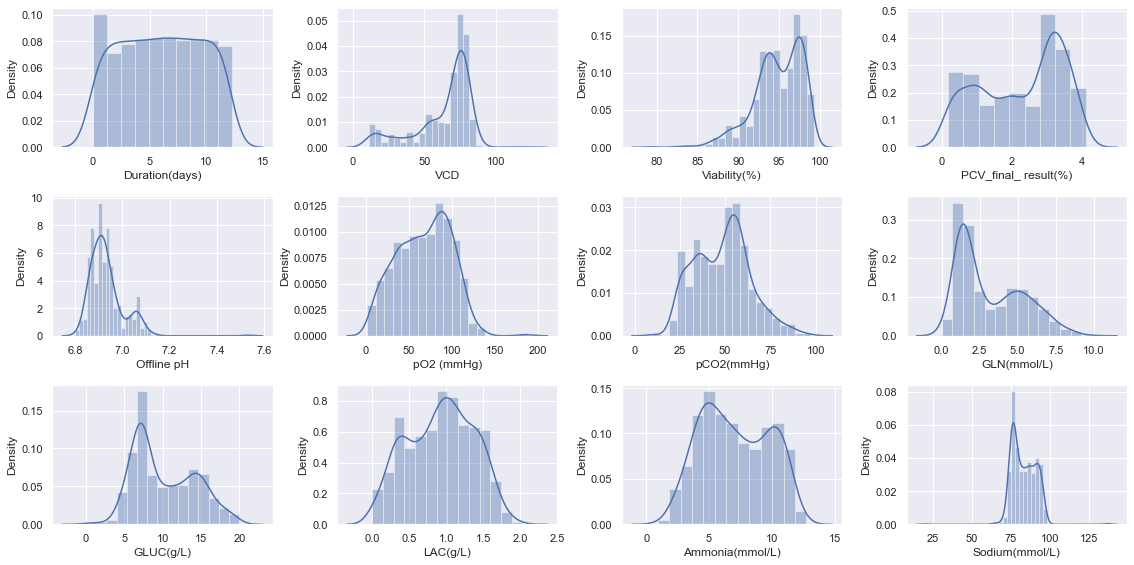

In [25]:
rows = 3
cols = 4
#Creating subplot
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (16, 8))
#Iterating through each row and column of the testing dataframe
col = df1.columns
index = 0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df1[col[index]], ax = ax[i][j])
        index += 1
plt.tight_layout()

<AxesSubplot:xlabel='Titer(g/L)', ylabel='Density'>

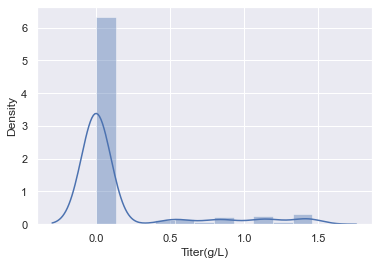

In [26]:
sns.distplot(df1['Titer(g/L)'],bins ="auto")

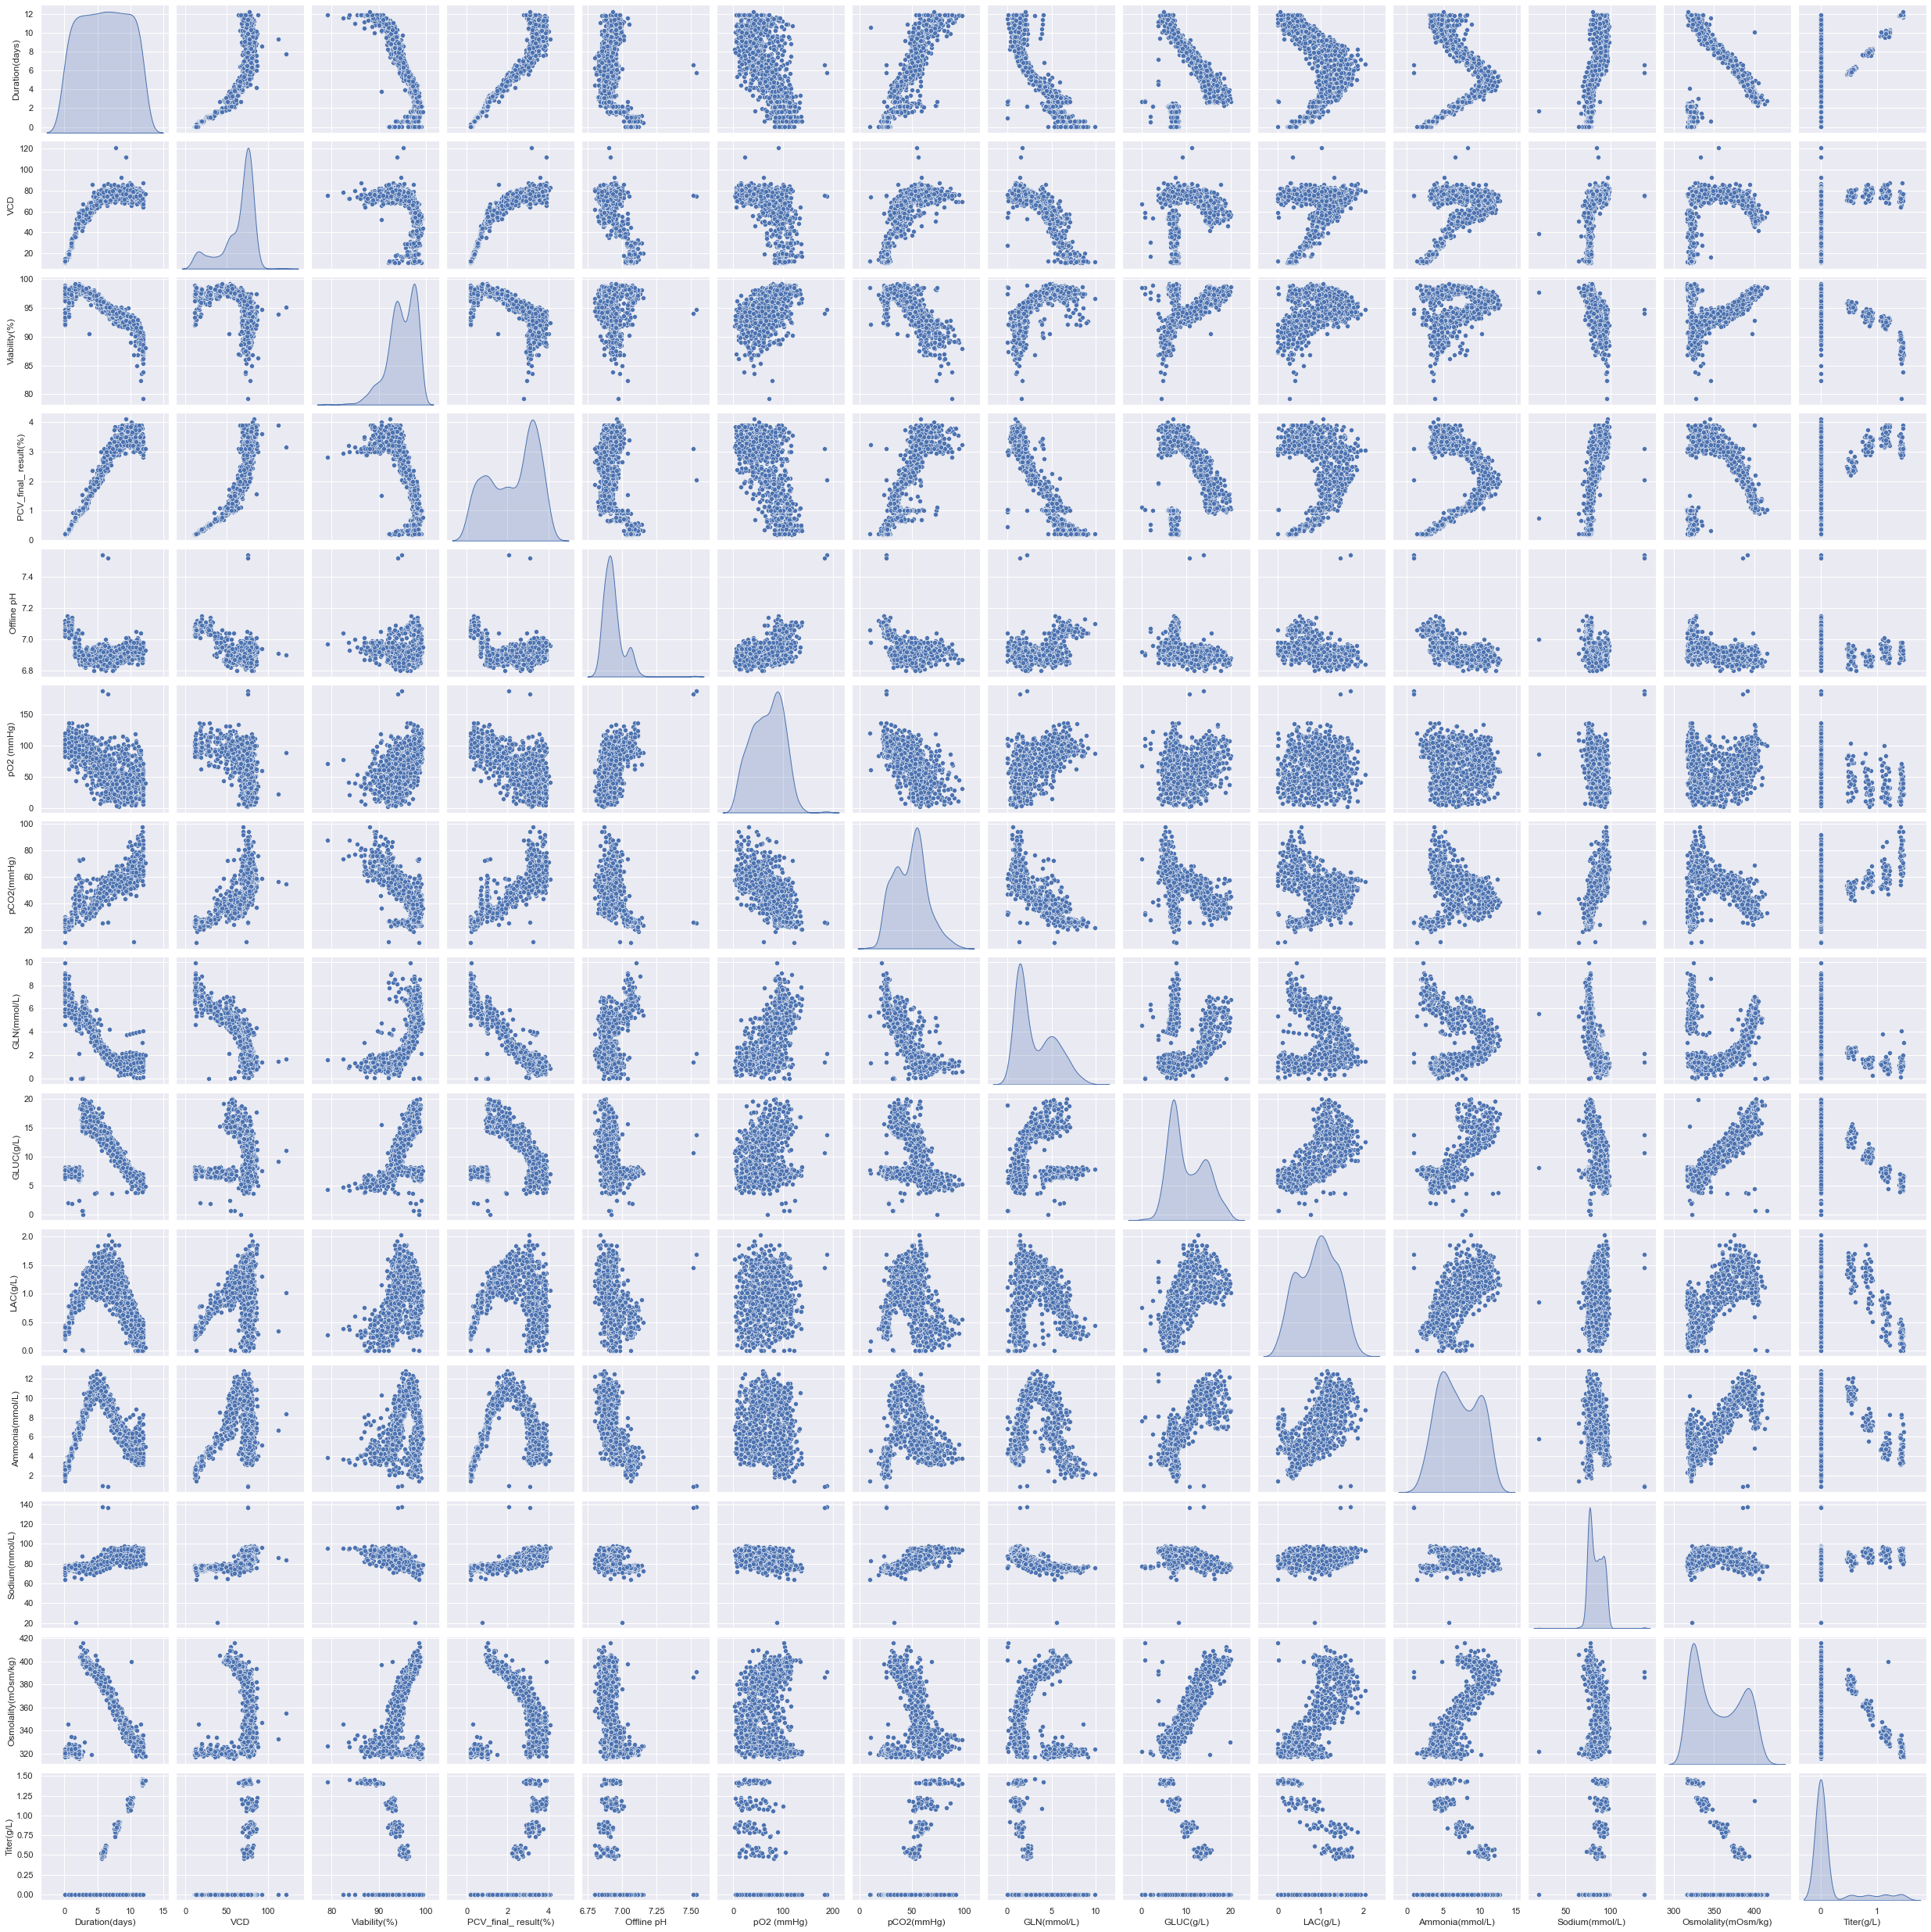

In [27]:
sns.pairplot(df1,diag_kind = 'kde')

<AxesSubplot:>

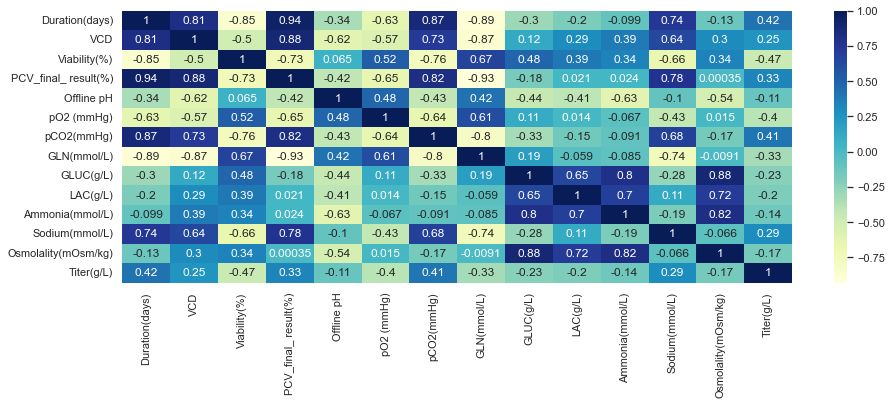

In [28]:
sns.set(color_codes=True)
df1.corr()
plt.subplots(figsize=(15,5))
sns.heatmap(df1.corr(), cmap= 'YlGnBu', annot=True)

In [29]:
fig = px.imshow(df1.corr())
fig.update_layout(title='Correlation Matrix among X variables')
fig.show()

In [30]:
df1.columns

Index(['Duration(days)', 'VCD', 'Viability(%)', 'PCV_final_ result(%)',
       'Offline pH', 'pO2 (mmHg)', 'pCO2(mmHg)', 'GLN(mmol/L)', 'GLUC(g/L)',
       'LAC(g/L)', 'Ammonia(mmol/L)', 'Sodium(mmol/L)', 'Osmolality(mOsm/kg)',
       'Titer(g/L)', 'Material_ Batch'],
      dtype='object')

In [31]:
import plotly.express as px
fig = px.scatter(df1, x="Material_ Batch", y="VCD", color='Material_ Batch')
fig.show()

In [33]:
import plotly.express as px
fig = px.scatter(df1, x="Material_ Batch", y="Titer(g/L)", color='Material_ Batch')
fig.show()


In [34]:
import plotly.express as px
fig = px.scatter(df1, x="VCD", y="Titer(g/L)", title='VCD vs Titer(g/L)', color='Material_ Batch')
fig.show()

In [38]:
import plotly.express as px
fig = px.scatter(df1, x="VCD", y="Viability(%)", title='VCD vs Viability(%)', color='Material_ Batch')
fig.show()

In [39]:
import plotly.express as px
fig = px.scatter(df1, x="PCV_final_ result(%)", y="VCD", title='VCD vs PCV_final_ result(%)', color='Material_ Batch')
fig.show()

In [68]:
import plotly.express as px
fig = px.scatter(df1, x="Duration(days)", y="PCV_final_ result(%)", title='Duration(days) vs PCV_final_ result(%)', color='Material_ Batch')
fig.show()

In [69]:
import plotly.express as px
fig = px.scatter(df1, x="Duration(days)", y="PCV_final_ result(%)", title='Duration(days) vs PCV_final_ result(%)', color='VCD')
fig.show()

In [70]:
import plotly.express as px
fig = px.line(df1, x="VCD", y="PCV_final_ result(%)", title='VCD vs PCV_final_ result(%)', color='Material_ Batch')
fig.show()

In [40]:
import plotly.express as px
fig = px.scatter(df1, x="pCO2(mmHg)", y="VCD", title='VCD vs pCO2(mmHg)', color='Material_ Batch')
fig.show()

In [41]:
import plotly.express as px
fig = px.scatter(df1, x="Sodium(mmol/L)", y="VCD", title='VCD vs Sodium(mmol/L)', color='Material_ Batch')
fig.show()

In [43]:
import plotly.express as px
fig = px.scatter(df1, x="Duration(days)", y="VCD", title='VCD vs Duration(days)', color='Material_ Batch')
fig.show()

In [44]:
import plotly.express as px
fig = px.scatter(df1, x="Duration(days)", y="VCD", title='VCD vs Duration(days)', color='LAC(g/L)')
fig.show()

In [45]:
import plotly.express as px
fig = px.scatter(df1, x="Duration(days)", y="VCD", title='VCD vs Duration(days)', color='Offline pH')
fig.show()


In [51]:
import plotly.express as px
fig = px.scatter(df1, x="Offline pH", y="VCD", title='VCD vs Duration(days)', color='Material_ Batch')
fig.show()

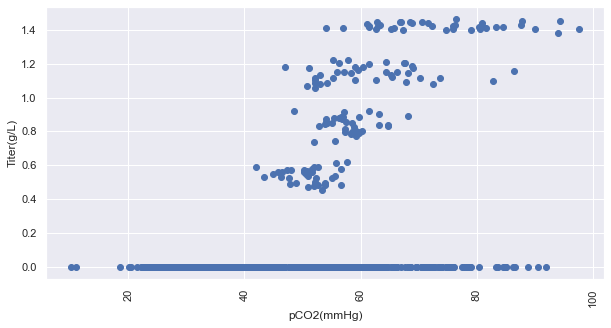

In [52]:
fig,ax = plt.subplots()
plt.scatter(df1['pCO2(mmHg)'],df1['Titer(g/L)'])
ax.set_ylabel('Titer(g/L)')
ax.set_xlabel('pCO2(mmHg)')           
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.show()


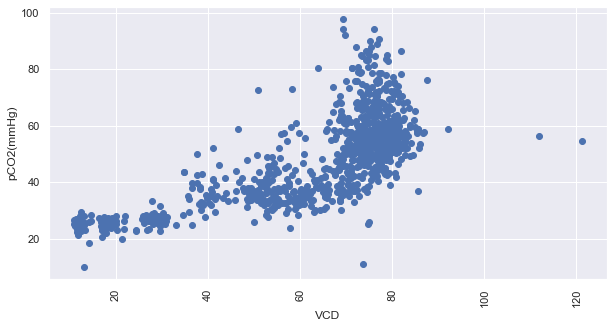

In [53]:
fig,ax = plt.subplots()
plt.scatter(df1['VCD'],df1['pCO2(mmHg)'])
ax.set_ylabel('pCO2(mmHg)')
ax.set_xlabel('VCD')           
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.show()


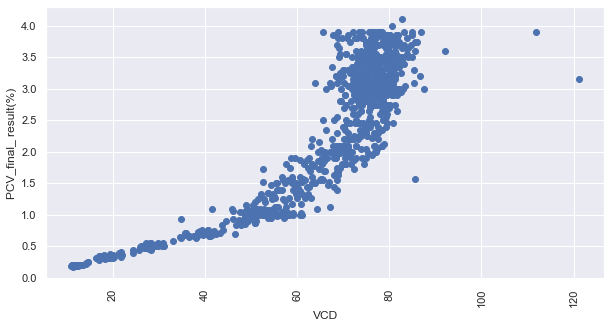

In [54]:
fig,ax = plt.subplots()
plt.scatter(df1['VCD'],df1['PCV_final_ result(%)'])
ax.set_ylabel('PCV_final_ result(%)')
ax.set_xlabel('VCD')           
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.show()

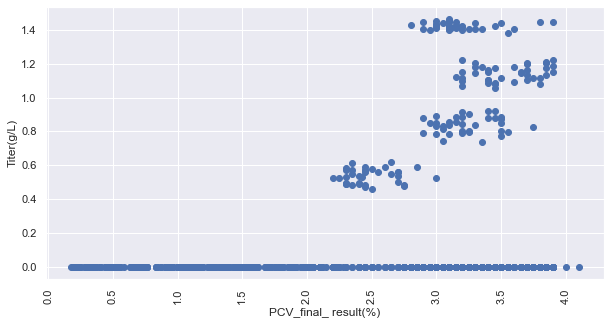

In [55]:
fig,ax = plt.subplots()
plt.scatter(df1['PCV_final_ result(%)'],df1['Titer(g/L)'])
ax.set_ylabel('Titer(g/L)')
ax.set_xlabel('PCV_final_ result(%)')           
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.show()


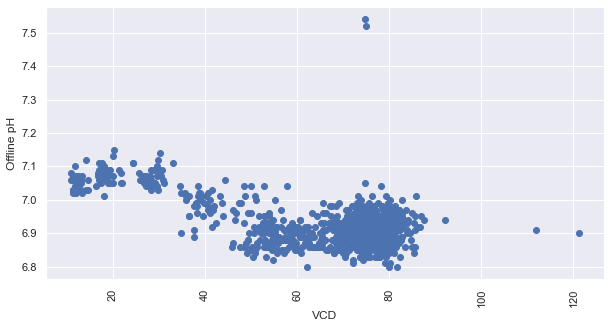

In [56]:
fig,ax = plt.subplots()
plt.scatter(df1['VCD'],df1['Offline pH'])
ax.set_ylabel('Offline pH')
ax.set_xlabel('VCD')           
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.show()

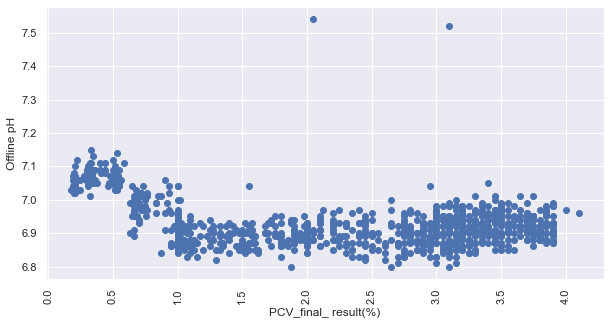

In [57]:
fig,ax = plt.subplots()
plt.scatter(df1['PCV_final_ result(%)'],df1['Offline pH'])
ax.set_ylabel('Offline pH')
ax.set_xlabel('PCV_final_ result(%)')           
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.show()

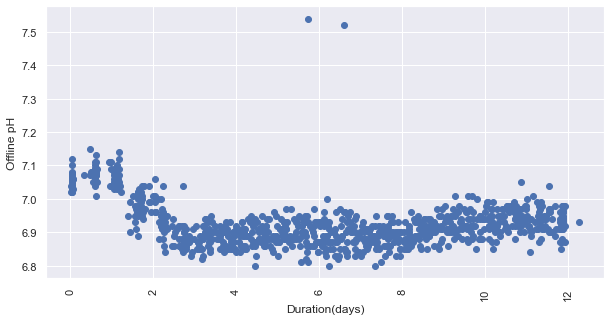

In [58]:
fig,ax = plt.subplots()
plt.scatter(df1['Duration(days)'],df1['Offline pH'])
ax.set_ylabel('Offline pH')
ax.set_xlabel('Duration(days)')           
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.show()

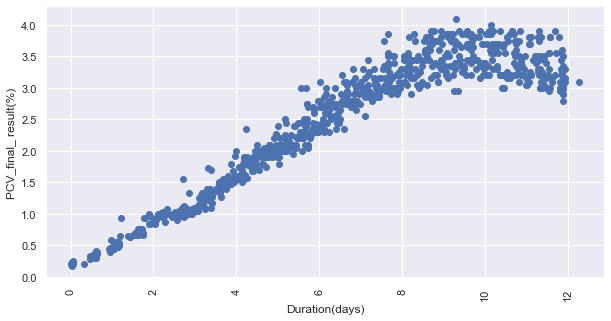

In [59]:
fig,ax = plt.subplots()
plt.scatter(df1['Duration(days)'],df1['PCV_final_ result(%)'])
ax.set_ylabel('PCV_final_ result(%)')
ax.set_xlabel('Duration(days)')           
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.show()

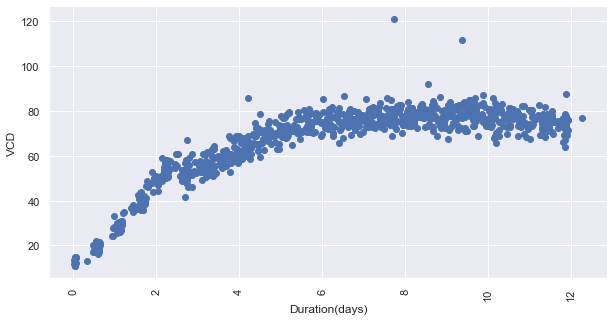

In [60]:
fig,ax = plt.subplots()
plt.scatter(df1['Duration(days)'],df1['VCD'])
ax.set_ylabel('VCD')
ax.set_xlabel('Duration(days)')           
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.show()

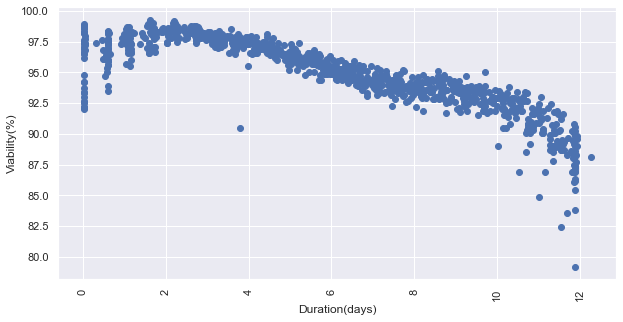

In [61]:
fig,ax = plt.subplots()
plt.scatter(df1['Duration(days)'],df1['Viability(%)'])
ax.set_ylabel('Viability(%)')
ax.set_xlabel('Duration(days)')           
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.show()

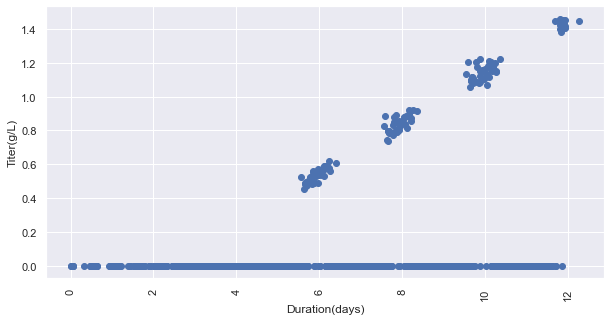

In [62]:
fig,ax = plt.subplots()
plt.scatter(df['Duration(days)'],df['Titer(g/L)'])
ax.set_ylabel('Titer(g/L)')
ax.set_xlabel('Duration(days)')           
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.show()

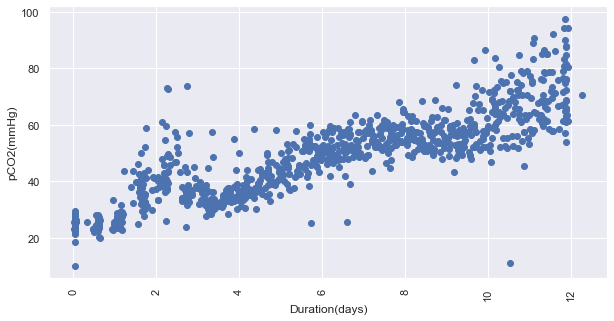

In [63]:
fig,ax = plt.subplots()
plt.scatter(df1['Duration(days)'],df1['pCO2(mmHg)'])
ax.set_ylabel('pCO2(mmHg)')
ax.set_xlabel('Duration(days)')           
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.show()

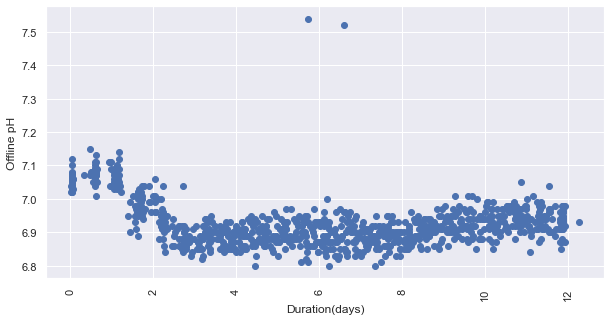

In [64]:
fig,ax = plt.subplots()
plt.scatter(df1['Duration(days)'],df1['Offline pH'])
ax.set_ylabel('Offline pH')
ax.set_xlabel('Duration(days)')           
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.show()

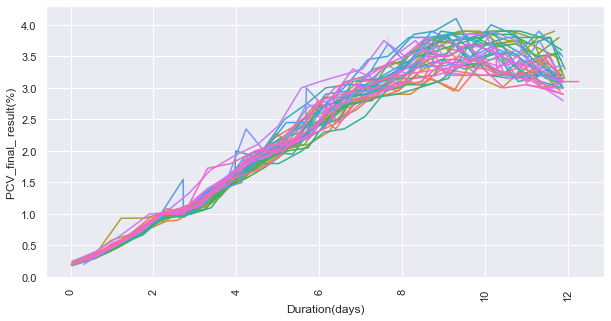

In [65]:
sns.lineplot(x="Duration(days)", y= "PCV_final_ result(%)", data=df,hue='Material_ Batch',legend =False)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.show()

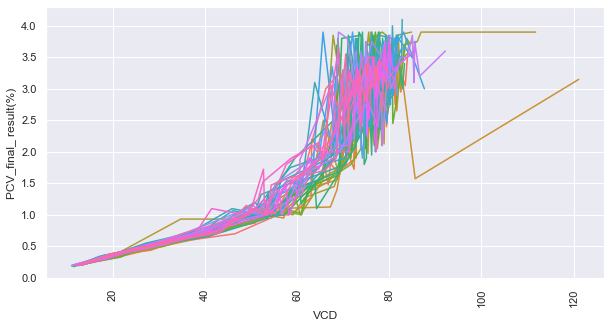

In [66]:
sns.lineplot(x="VCD", y= "PCV_final_ result(%)", data=df,hue='Material_ Batch',legend =False)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.show()

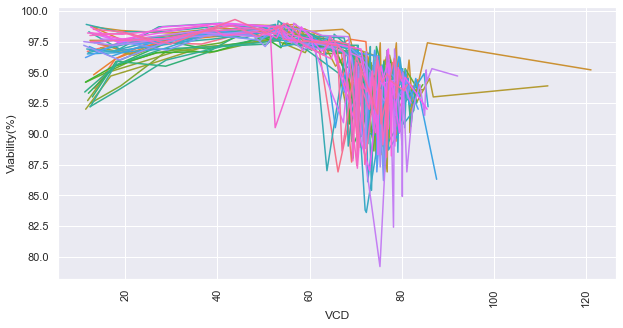

In [67]:
sns.lineplot(x="VCD", y= "Viability(%)", data=df,hue='Material_ Batch',legend =False)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.show()

In [71]:
#Remove the outliers from the data
#df1.head(20)
#Q1 = df1.quantile(0.25)
#Q3 = df1.quantile(0.75)
#IQR = Q3 - Q1
#df2 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
#df2.head(4)

In [72]:
pivot1 = pd.pivot_table(data= df1, index='Material_ Batch', values=['Duration(days)','VCD','Viability(%)','PCV_final_ result(%)','Offline pH','pO2 (mmHg)','pCO2(mmHg)','GLN(mmol/L)','GLUC(g/L)','LAC(g/L)','Ammonia(mmol/L)','Sodium(mmol/L)','Osmolality(mOsm/kg)'], aggfunc=['mean'])
pivot1.columns = pivot1.columns.droplevel(0)
pivot1 = pivot1.reset_index()
pivot1.round()

Material_ Batch  Ammonia(mmol/L)  Duration(days)  GLN(mmol/L)  GLUC(g/L)  \
0    804564 SB0008              8.0             6.0          3.0       12.0   
1    804564 SB0010              8.0             6.0          4.0       12.0   
2    804564 SB0021              7.0             6.0          3.0        9.0   
3    804564 SB0022              7.0             6.0          3.0       10.0   
4    804564 SB0040              7.0             6.0          3.0       11.0   
5    804564 SB0041              7.0             6.0          4.0       11.0   
6    804564 SB0042              7.0             6.0          3.0       11.0   
7    804564 SB0043              7.0             6.0          3.0       10.0   
8    804564 SB0044              7.0             6.0          3.0       10.0   
9    804564 SB0045              7.0             6.0          3.0       10.0   
10   804564 SB0053              8.0             6.0          3.0       10.0   
11   804564 SB0090              7.0             6.0          4.0       10.0   
12   804564 SB0091              7.0             6.0          3.0       10.0   
13   804564 SB0092              7.0             6.0          3.0       10.0   
14   805593 SB0001              8.0             6.0          3.0       12.0   
15   805593 SB0002              7.0             6.0          3.0       10.0   
16   805593 SB0006              7.0             6.0          3.0       11.0   
17   805593 SB0007              7.0             6.0          3.0       11.0   
18   805593 SB0008              8.0             6.0          4.0       11.0   
19   805593 SB0035              7.0             6.0          3.0        9.0   
20   805593 SB0036              6.0             6.0          3.0       10.0   
21   805593 SB0037              7.0             6.0          3.0       10.0   
22   805593 SB0039              6.0             6.0          3.0       10.0   
23   805593 SB0040              6.0             6.0          3.0       10.0   
24   805593 SB0041              7.0             6.0          3.0       10.0   
25   805593 SB0042              7.0             6.0          3.0       10.0   
26   805593 SB0043              7.0             6.0          3.0       10.0   
27   805593 SB0061              7.0             6.0          3.0        9.0   
28   805593 SB0062              7.0             6.0          3.0        9.0   
29   805918 SB0001              7.0             6.0          3.0       10.0   
30   805918 SB0002              7.0             6.0          3.0        9.0   
31   805918 SB0003              7.0             6.0          3.0       10.0   
32   805918 SB0007              6.0             6.0          3.0       10.0   
33   805918 SB0008              7.0             6.0          3.0        9.0   
34   805918 SB0015              8.0             6.0          3.0       10.0   
35   805918 SB0016              7.0             6.0          3.0       11.0   
36   805918 SB0017              7.0             6.0          3.0       11.0   
37   805918 SB0020              6.0             6.0          3.0       10.0   

    LAC(g/L)  Offline pH  Osmolality(mOsm/kg)  PCV_final_ result(%)  \
0        1.0         7.0                359.0                   2.0   
1        1.0         7.0                353.0                   2.0   
2        1.0         7.0                357.0                   2.0   
3        1.0         7.0                358.0                   2.0   
4        1.0         7.0                352.0                   2.0   
5        1.0         7.0                353.0                   2.0   
6        1.0         7.0                349.0                   2.0   
7        1.0         7.0                350.0                   2.0   
8        1.0         7.0                360.0                   2.0   
9        1.0         7.0                357.0                   2.0   
10       1.0         7.0                360.0                   2.0   
11       1.0         7.0                357.0                   2.0  

<AxesSubplot:>

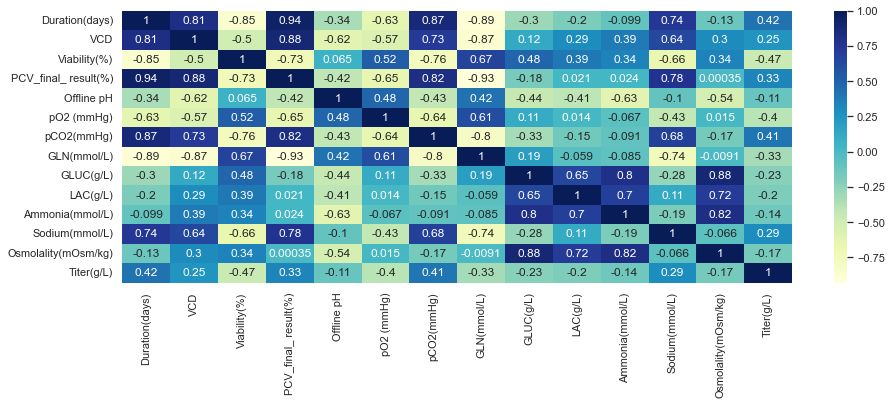

In [73]:
sns.set(color_codes=True)
pivot1.corr()
plt.subplots(figsize=(15,5))
sns.heatmap(df1.corr(), cmap= 'YlGnBu', annot=True)

In [74]:
import plotly.express as px
fig = px.scatter(pivot1, x="Material_ Batch", y="VCD", color='Material_ Batch')
fig.show()

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics

In [85]:
df2 =df1[['VCD','Viability(%)','PCV_final_ result(%)','Offline pH','pO2 (mmHg)','pCO2(mmHg)','GLN(mmol/L)','GLUC(g/L)','LAC(g/L)','Ammonia(mmol/L)','Sodium(mmol/L)','Osmolality(mOsm/kg)','Titer(g/L)','Duration(days)']]

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.DataFrame({'variables':df2.columns[:-1], 'VIF':[variance_inflation_factor(df2.values, i+1) for i in range(len(df2.columns[:-1]))]})

variables          VIF
0                    VCD  5208.283360
1           Viability(%)   113.544833
2   PCV_final_ result(%)  6291.664206
3             Offline pH    12.477258
4             pO2 (mmHg)    55.233366
5             pCO2(mmHg)    29.618930
6            GLN(mmol/L)    48.886239
7              GLUC(g/L)    31.318678
8               LAC(g/L)    56.601473
9        Ammonia(mmol/L)   710.045196
10        Sodium(mmol/L)   963.247623
11   Osmolality(mOsm/kg)     1.624476
12            Titer(g/L)   148.216130

In [179]:
X1= df2[['Duration(days)','Viability(%)','PCV_final_ result(%)','Offline pH','pO2 (mmHg)','pCO2(mmHg)','GLN(mmol/L)','GLUC(g/L)','LAC(g/L)','Ammonia(mmol/L)','Sodium(mmol/L)','Osmolality(mOsm/kg)','Titer(g/L)']]
y1= df2['VCD']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state= 124)



In [180]:
X1.shape

(929, 13)

In [181]:
y1.shape

(929,)

In [182]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Duration(days)        929 non-null    float64
 1   Viability(%)          929 non-null    float64
 2   PCV_final_ result(%)  929 non-null    float64
 3   Offline pH            929 non-null    float64
 4   pO2 (mmHg)            929 non-null    float64
 5   pCO2(mmHg)            929 non-null    float64
 6   GLN(mmol/L)           929 non-null    float64
 7   GLUC(g/L)             929 non-null    float64
 8   LAC(g/L)              929 non-null    float64
 9   Ammonia(mmol/L)       929 non-null    float64
 10  Sodium(mmol/L)        929 non-null    float64
 11  Osmolality(mOsm/kg)   929 non-null    int64  
 12  Titer(g/L)            929 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 94.5 KB


In [183]:
y1.info()

<class 'pandas.core.series.Series'>
RangeIndex: 929 entries, 0 to 928
Series name: VCD
Non-Null Count  Dtype  
--------------  -----  
929 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


In [184]:
y1

0      14.03
1      20.12
2      27.76
3      36.55
4      49.95
       ...  
924    78.78
925    74.78
926    75.51
927    67.07
928    76.75
Name: VCD, Length: 929, dtype: float64

In [185]:
X1_train

Duration(days)  Viability(%)  PCV_final_ result(%)  Offline pH  \
778       10.865972          90.3                  3.40        7.05   
59         4.899306          96.5                  2.20        6.96   
626        8.162500          93.7                  3.40        6.91   
160        6.413194          95.5                  2.50        6.96   
701        8.681250          93.4                  3.60        6.92   
..              ...           ...                   ...         ...   
681       10.738194          90.8                  3.20        6.94   
135        6.235417          96.0                  2.65        6.80   
17         8.450000          92.8                  3.05        6.92   
668        4.666667          96.9                  2.00        6.86   
462       10.998611          92.4                  3.15        6.97   

     pO2 (mmHg)  pCO2(mmHg)  GLN(mmol/L)  GLUC(g/L)  LAC(g/L)  \
778       105.5        45.6         1.78       5.23      0.68   
59         97.4        40.2         3.08      14.29      1.68   
626        99.6        55.0         1.12       9.16      1.27   
160        48.8        45.0         1.89      13.66      1.05   
701        56.8        54.8         1.47       8.12      1.19   
..          ...         ...          ...        ...       ...   
681        29.8        84.6         1.25       6.02      0.23   
135        27.4        57.6         2.32      14.05      1.14   
17         40.5        50.8         1.56       9.93      0.69   
668        76.5        41.4         3.40      14.01      1.36   
462        66.2        63.4         1.20       5.97      0.35   

     Ammonia(mmol/L)  Sodium(mmol/L)  Osmolality(mOsm/kg)  Titer(g/L)  
778             3.83            93.2                  331        0.00  
59             10.83            83.6                  401        0.00  
626             6.59            92.4                  357        0.00  
160             9.30            79.5                  374        0.00  
701             5.80            92.7                  351        0.00  
..               ...             ...                  ...         ...  
681             5.55            90.2                  328        0.00  
135            10.86            80.3                  374        0.62  
17              7.55            81.4                  352        0.00  
668            10.79            80.8                  386        0.00  
462             4.82            88.2                  326        0.00  

[743 rows x 13 columns]

In [186]:
y1_train

778    74.82
59     63.13
626    80.52
160    65.66
701    72.82
       ...  
681    76.31
135    81.62
17     76.91
668    69.18
462    80.45
Name: VCD, Length: 743, dtype: float64

In [187]:
X1_test

Duration(days)  Viability(%)  PCV_final_ result(%)  Offline pH  \
207        5.849306          95.4                  2.70        6.86   
247        1.172917          96.7                  0.50        7.05   
392        0.026389          93.4                  0.20        7.06   
319        0.035417          94.2                  0.18        7.03   
97        11.479167          90.2                  3.40        6.94   
..              ...           ...                   ...         ...   
321        1.156250          96.6                  0.47        7.05   
891        6.028472          96.0                  2.80        6.87   
330        5.727778          94.8                  2.05        7.54   
746        7.047917          94.4                  3.30        6.84   
513       11.929861          89.8                  3.30        6.92   

     pO2 (mmHg)  pCO2(mmHg)  GLN(mmol/L)  GLUC(g/L)  LAC(g/L)  \
207        39.1        51.7         2.40      15.68      1.10   
247        86.9        27.6         7.37       7.79      0.62   
392       100.8        24.6         8.50       8.26      0.34   
319        95.7        26.3         7.41       7.73      0.39   
97         46.2        78.6         0.89       5.21      0.25   
..          ...         ...          ...        ...       ...   
321       106.9        23.1         6.97       7.46      0.71   
891        42.2        52.8         1.80      14.54      1.12   
330       187.7        25.3         2.17      13.79      1.69   
746        30.5        58.3         1.49       9.38      1.80   
513        13.0        80.6         1.11       4.24      0.50   

     Ammonia(mmol/L)  Sodium(mmol/L)  Osmolality(mOsm/kg)  Titer(g/L)  
207            11.66            79.2                  373       0.558  
247             5.00            74.7                  322       0.000  
392             2.08            75.6                  320       0.000  
319             2.81            74.1                  322       0.000  
97              4.59            90.8                  326       0.000  
..               ...             ...                  ...         ...  
321             4.94            74.6                  321       0.000  
891            10.20            82.4                  378       0.000  
330             0.95           137.3                  391       0.000  
746             6.69            96.3                  369       0.000  
513             3.20            94.3                  329       1.408  

[186 rows x 13 columns]

In [188]:
y1_test

207    79.20
247    30.97
392    11.18
319    11.33
97     72.99
       ...  
321    26.69
891    74.80
330    74.83
746    85.28
513    71.31
Name: VCD, Length: 186, dtype: float64

In [189]:
lr = LinearRegression().fit(X1_train,y1_train)
print(lr.intercept_)
print(lr.coef_)

14.800880887894174
[ 3.65341205e+00  1.27952778e+00  4.35184926e+00 -1.66800763e+01
  2.98551738e-02  1.24393783e-01 -9.20938110e-01 -1.67784064e-01
  7.12127825e+00  2.02492906e+00 -1.00289419e-01 -1.29714592e-02
 -5.32003059e-01]


In [190]:
y1_pred = lr.predict(X1_test)

In [191]:
df_compare= pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred})
df_compare.head()

Actual  Predicted
207   79.20  76.685760
247   30.97  28.202492
392   11.18   9.270175
319   11.33  13.850854
97    72.99  78.391610

In [192]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))
print('R Square:', metrics.r2_score(y1_test, y1_pred))

Mean Absolute Error: 3.7838153267838157
Mean Squared Error: 36.78679340108046
Root Mean Squared Error: 6.065211735881976
R Square: 0.9022258835412094


In [193]:
import scipy.integrate
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV, validation_curve
from sklearn.metrics import mean_squared_error

In [194]:
# Fit Linear Model
datascaler = StandardScaler()
does = datascaler.fit_transform(X1.values)
X = sm.add_constant(does)
y = y1.values
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     1105.
Date:                Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:52:51   Log-Likelihood:                -2784.7
No. Observations:                 929   AIC:                             5597.
Df Residuals:                     915   BIC:                             5665.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.7237      0.160    397.584      0.0

In [223]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X2_train = sc.fit_transform(X1_train)
X2_test = sc.transform (X2_test)
y2_train = y1_train

In [224]:
#X2_train

In [225]:
lr = LinearRegression().fit(X2_train,y2_train)
print(lr.intercept_)
print(lr.coef_)

63.92845222072676
[13.0246927   3.79844069  5.09200416 -1.12653482  0.89904243  1.89285143
 -1.96568409 -0.66796118  3.16245244  5.4261657  -0.75368701 -0.37797245
 -0.20730162]


In [226]:
#y2_train

In [227]:
y2_pred = lr.predict(X2_test)

In [228]:
df_compare= pd.DataFrame({'Actual': y2_test, 'Predicted': y2_pred})
df_compare.head()

Actual     Predicted
0   79.20  26337.137726
1   30.97  24342.654588
2   11.18  24232.802269
3   11.33  24547.164832
4   72.99  25488.038669

In [229]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Square:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.783815326783814
Mean Squared Error: 36.7867934010806
Root Mean Squared Error: 6.065211735881988
R Square: 0.902225883541209


In [211]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X1_train)
X3_train = scaler.transform(X1_train)
X3_test = scaler.transform(X1_test)
model = LinearRegression()
model.fit(X3_train, y1_train)
y3_pred = model.predict(X3_test)

In [212]:
print(model.intercept_)
print(model.coef_)

1.6595495243171356
[44.71370409 25.59055561 17.01573059 -5.83802669  4.0005933  10.8720166
 -9.10807791 -3.29695685 14.45619484 22.96269551 -7.75738653 -1.28417446
 -0.77406445]


In [213]:
y3_pred = model.predict(X3_test)

In [214]:
df_compare1= pd.DataFrame({'Actual': y1_test, 'Predicted': y3_pred})
df_compare1.head()

Actual  Predicted
207   79.20  76.685760
247   30.97  28.202492
392   11.18   9.270175
319   11.33  13.850854
97    72.99  78.391610

In [215]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y3_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y3_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y3_pred)))
print('R Square:', metrics.r2_score(y1_test, y3_pred))

Mean Absolute Error: 3.783815326783815
Mean Squared Error: 36.78679340108062
Root Mean Squared Error: 6.06521173588199
R Square: 0.9022258835412089
